<a href="https://colab.research.google.com/github/ttury/Do_It_For_Deep-Learning/blob/main/Single_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# data set prepare

from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [23]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = list() # 에포크마다 손실 함수 평균값

  def forpass(self, x_i):
    z = np.sum(self.w * x_i) + self.b # 하나의 값
    return z

  def backprop(self, x_i, err):
    w_grad = x_i * err # 다차원 벡터
    b_grad = 1 * err # 하나의 값
    return w_grad, b_grad

  def activation(self, z):
    z = np.clip(z, -100, None) # 최솟값 -100, 최댓값 x
    a = 1 / (1 + np.exp(-z)) # 시그모이드 계산
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 열 개수(특성 개수)
    self.b = 0

    for _ in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      '''
      에포크마다 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄임
      arrange 함수 : 0 부터 len(x) - 1까지 1씩 커지는 array 생성
      permutation 함수 : array를 무작위로 섞음(실제 array 값에는 변화 없음)
      '''

      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10) # (10의 -10승) ~ (1 - 10의 -10승) 범위
        logistic_loss = -(y[i] * np.log(a) + (1-y[i]) * np.log(1-a)) # 로지스틱 손실 함수 값 구하기
        loss += logistic_loss

      self.losses.append(loss/len(y)) # 손실 함수의 결과값을 샘플 개수로 나누어 평균값 구하기

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 다차원 벡터
    return np.array(z) > 0 # 다차원 벡터
    '''
    시그모이드 출력값의 판단 기준은 0.5이다.
    z가 0보다 크면 a가 0.5보다 크고 a가 0보다 작으면 a가 0.5보다 작아지기 때문에
    predict 함수에서는 굳이 시그모이드 함수를 사용할 필요가 없이 z만으로 비교한다.
    '''
    
  def score(self, x, y):
    return np.mean(self.predict(x) == y) # 정확도 계산
  
layer = SingleLayer()
layer.fit(x_train, y_train)
print(layer.score(x_test, y_test))

0.9210526315789473


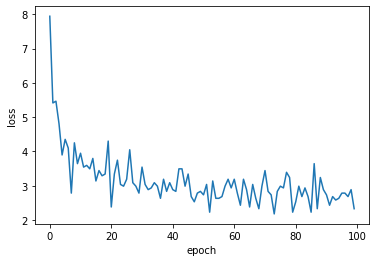

In [24]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()